<a href="https://colab.research.google.com/github/ania-wis/Animals-10-ImageClassification/blob/main/Animals_10_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint

In [23]:
base_dir = '/content/drive/MyDrive/AI/Images/'
img_size = 128
batch_size = 32

In [ ]:
count = 0
dirs = os.listdir(base_dir)
for dir in dirs:
  files = list(os.listdir(base_dir+ dir))
  print( dir + ' Folder has ' + str(len(files)) + ' images')
  count = count + len(files)
print( 'Images folder has ' + str(count) + ' images')

chicken Folder has 3098 images
dog Folder has 4863 images
cow Folder has 1866 images
cat Folder has 1668 images
spider Folder has 4841 images
elephant Folder has 1446 images
horse Folder has 2623 images
butterfly Folder has 2112 images
sheep Folder has 1820 images
squirrel Folder has 1862 images
Images folder has 26199 images


In [24]:
# Trening
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,  # 30% to be used for validation and test
    subset='training',
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# Walidacja
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

Found 26199 files belonging to 10 classes.
Using 18340 files for training.
Found 26199 files belonging to 10 classes.
Using 7859 files for validation.


In [25]:
animal_names = train_ds.class_names

animal_names


['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
# Zestaw walidacyjny i testowy
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_ds = val_ds.skip(val_batches // 2)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
shuffle_buffer_size = 100

train_ds = train_ds.cache().shuffle(shuffle_buffer_size,seed=123).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/AI/ModelsV2/model_epoch_{epoch:02d}.keras',  # Filepath to save the model
    save_weights_only=False,  # Save the whole model (architecture + weights + optimizer state)
    save_freq='epoch'  # Save after every epoch
)

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint_callback])

Epoch 1/10
574/574 [==============================] - 3952s 6s/step - loss: 1.9963 - accuracy: 0.2961 - val_loss: 1.7950 - val_accuracy: 0.4022
Epoch 2/10
574/574 [==============================] - 573s 998ms/step - loss: 1.6479 - accuracy: 0.4346 - val_loss: 1.4310 - val_accuracy: 0.5167
Epoch 3/10
574/574 [==============================] - 573s 999ms/step - loss: 1.4230 - accuracy: 0.5142 - val_loss: 1.3012 - val_accuracy: 0.5669
Epoch 4/10
574/574 [==============================] - 565s 985ms/step - loss: 1.2627 - accuracy: 0.5683 - val_loss: 1.1660 - val_accuracy: 0.6141
Epoch 5/10
574/574 [==============================] - 579s 1s/step - loss: 1.1218 - accuracy: 0.6135 - val_loss: 1.0982 - val_accuracy: 0.6398
Epoch 6/10
574/574 [==============================] - 595s 1s/step - loss: 1.0035 - accuracy: 0.6521 - val_loss: 1.1276 - val_accuracy: 0.6426
Epoch 7/10
574/574 [==============================] - 560s 976ms/step - loss: 0.8927 - accuracy: 0.6923 - val_loss: 1.1027 - val_acc

In [ ]:
# Ocena modelu
model = tf.keras.models.load_model('/content/drive/MyDrive/AI/ModelsV2/model_epoch_10.keras')
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

123/123 [==============================] - 644s 5s/step - loss: 1.8583 - accuracy: 0.6687
Test Loss: 1.8583221435546875
Test Accuracy: 0.6686992049217224


1/1 [==============================] - 0s 153ms/step
Predykcja: butterfly
butterfly: 100.00%
cat: 0.00%
chicken: 0.00%
cow: 0.00%
dog: 0.00%
elephant: 0.00%
horse: 0.00%
sheep: 0.00%
spider: 0.00%
squirrel: 0.00%


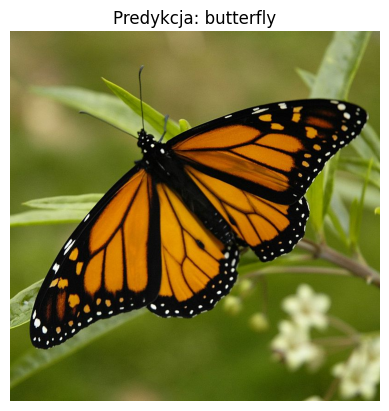

In [37]:
class_names = ['butterfly','cat','chicken','cow', 'dog','elephant', 'horse', 'sheep', 'spider', 'squirrel']
def classify_single_image(model, img_path, img_size, class_names):
    # Załaduj obraz w oryginalnym rozmiarze
    original_img = image.load_img(img_path)
    original_img_array = image.img_to_array(original_img)

    # Załaduj obraz w rozmiarze 128x128 dla klasyfikacji
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizacja

    # Predykcja
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_class_name = class_names[predicted_class[0]]

    # Wyświetlanie wyników
    print(f"Predykcja: {predicted_class_name}")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {predictions[0][i]*100:.2f}%")

    # Wyświetlanie oryginalnego obrazu
    plt.imshow(image.array_to_img(original_img_array))
    plt.title(f"Predykcja: {predicted_class_name}")
    plt.axis('off')
    plt.show()

# Ścieżka do pojedynczego zdjęcia
img_path = '/content/drive/MyDrive/AI/Test/butterfly.jpg'
model = tf.keras.models.load_model('/content/drive/MyDrive/AI/ModelsV2/model_epoch_10.keras')
classify_single_image(model, img_path, img_size, class_names)

1/1 [==============================] - 0s 232ms/step
Predykcja: horse
butterfly: 0.00%
cat: 0.00%
chicken: 0.04%
cow: 0.00%
dog: 1.13%
elephant: 0.00%
horse: 98.83%
sheep: 0.00%
spider: 0.00%
squirrel: 0.00%


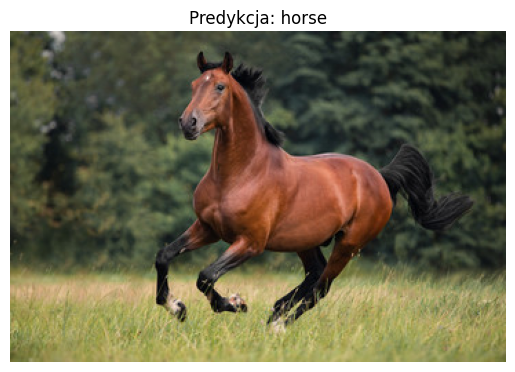

In [ ]:
img_path = '/content/drive/MyDrive/AI/Test/horse.jpg'
classify_single_image(model, img_path, img_size, class_names)

1/1 [==============================] - 0s 31ms/step
Predykcja: cow
butterfly: 0.19%
cat: 0.04%
chicken: 1.57%
cow: 46.93%
dog: 15.33%
elephant: 0.58%
horse: 17.45%
sheep: 7.20%
spider: 10.27%
squirrel: 0.42%


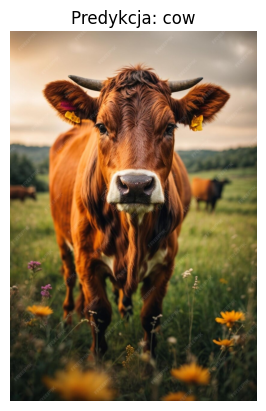

In [ ]:
img_path = '/content/drive/MyDrive/AI/Test/cow.jpg'
classify_single_image(model, img_path, img_size, class_names)